In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from nionswift_plugin.nionswift_structure_recognition.test.sample import graphene_in_a_box, gaussian_superposition

In [35]:
json_file_name = '../models/u-net.json'
parameter_file_name = '../models/graphene-stem.h5'

json_file = open(json_file_name, 'r')

#logging.info('Loading model from "{}"'.format(json_file_name))
model = keras.models.model_from_json(json_file.read())

model.load_weights(parameter_file_name)

In [26]:
38/512

0.07421875

In [27]:
size = (38,38)
shape = (512,512)

positions, cell = graphene_in_a_box(size, rotation=np.random.rand() * 360., a=2.46)
image = gaussian_superposition(positions, shape, (0,0), size, .5)
image = np.random.poisson(1 + image).astype(np.float32)

image = (image-image.mean())/image.std()


In [31]:
#density

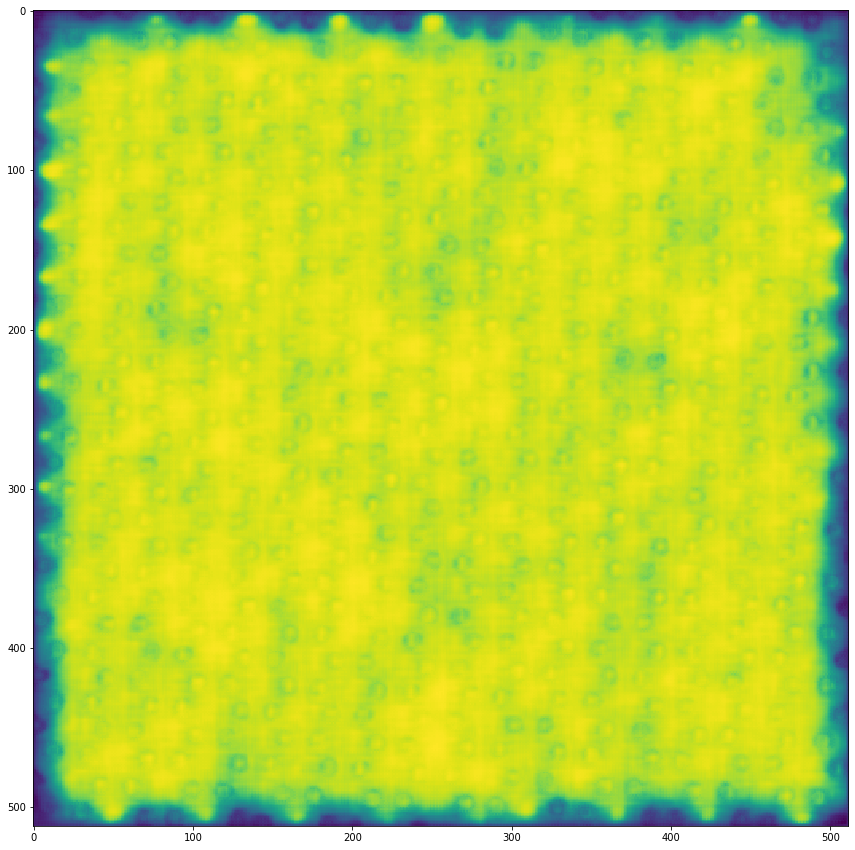

In [32]:
density, confidence = model(image[None,...,None])

plt.figure(figsize=(15,15))
plt.imshow(confidence[0,...,0])